## Importing Laibraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

## Importing Dataset From Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 223MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s]


## Unzip The Dataset

In [ ]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()



# Generator:
A generator is like a magic tool in programming that helps us deal with big sets of data without using too much computer memory. It's like a smart assistant that only gives us the data we need, one piece at a time, instead of overwhelming us with everything at once.

## Why Use Generators:
Generators are cool because they save memory and work efficiently. Imagine you have tons of data; generators help process it bit by bit, making things manageable. They're like a friendly helper, giving us just the right amount of data when we need it. This is super handy in situations where we want to be smart about using computer resources and not waste them.


#Data Augmentation:
Data augmentation is a technique in machine learning that involves applying various transformations to existing data to create new, slightly modified versions. In image data, these transformations may include changes like rotation, flipping, and zooming. The goal is to increase the diversity of the training dataset, improving the model's ability to generalize to different conditions and variations in the input data.

## Preparing The Generator For Augmentation




In [ ]:
datagen=ImageDataGenerator(
    rescale=1/255 # scales the pixel values of the images in range of [0 to 1]
   ,validation_split=0.2 # used for 20% data splitting
   ,rotation_range=10 # defines the range (in degrees) for random rotations applied to the images
   ,width_shift_range=0.1 # controls the range for random horizontal shifts of the images
   ,height_shift_range=0.1 # controls the range for random vertical shifts of the images
   ,shear_range=0.1 # tilts the shapes of objects
   ,zoom_range=0.10 # apply zooming to the images
   ,horizontal_flip=True # enables horizontal flipping of the images
    )

# Generator For Training Data & Validation Data

In [ ]:
#Training Generator
train_generator=datagen.flow_from_directory("/content/train",
    target_size=(150,150) #Resize the image to (150x150) pixels
    , batch_size=128 #specifies the number of samples in each batch
    ,class_mode='binary' # specifies the type of problem, which is binary classification in our case
    ,subset='training'  #specifies that this generator is intended for the training
    )

#Validation Generator
val_generator=datagen.flow_from_directory("/content/train",
    target_size=(150,150)  #Resize the image to (150x150) pixels
    , batch_size=128,  #specifies the number of samples in each batc
    class_mode='binary' # specifies the type of problem, which is binary classification in our case
    ,subset='validation') #specifies that this generator is intended for the validation

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Data Modeling With CNN

In a typical convolutional neural network (CNN) architecture, the input data goes through a series of layers organized in a hierarchical manner. Each layer captures different levels of abstraction, and the information is progressively refined as it passes through the network.

In [ ]:
model=tf.keras.Sequential([

    #1st layer CNN

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(),
    # Normalize the inputs of a layer in a neural network
    tf.keras.layers.BatchNormalization(),
    # Dropout is a regularization technique use to prevent overfitting
    tf.keras.layers.Dropout(0.2),

    #2nd layer CNN

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    # Normalize the inputs of a layer in a neural network
    tf.keras.layers.BatchNormalization(),
    # Dropout is a regularization technique use to prevent overfitting
    tf.keras.layers.Dropout(0.2),

    #3rd layer CNN

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    # Normalize the inputs of a layer in a neural network
    tf.keras.layers.BatchNormalization(),
    # Dropout is a regularization technique use to prevent overfitting
    tf.keras.layers.Dropout(0.2),

    #flatten layer
    tf.keras.layers.Flatten(),

    #fully connected layer
    tf.keras.layers.Dense(512,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 74, 74, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)       

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=25,validation_data=val_generator)

Epoch 1/25
125/125 [==============================] - 146s 1s/step - loss: 2.3254 - accuracy: 0.6127 - val_loss: 1.3811 - val_accuracy: 0.5240
Epoch 2/25
125/125 [==============================] - 143s 1s/step - loss: 0.6453 - accuracy: 0.6915 - val_loss: 0.6831 - val_accuracy: 0.6465
Epoch 3/25
125/125 [==============================] - 153s 1s/step - loss: 0.5310 - accuracy: 0.7372 - val_loss: 1.2710 - val_accuracy: 0.5735
Epoch 4/25
125/125 [==============================] - 155s 1s/step - loss: 0.4995 - accuracy: 0.7599 - val_loss: 1.3328 - val_accuracy: 0.5720
Epoch 5/25
125/125 [==============================] - 157s 1s/step - loss: 0.4684 - accuracy: 0.7724 - val_loss: 0.8638 - val_accuracy: 0.6557
Epoch 6/25
125/125 [==============================] - 162s 1s/step - loss: 0.4481 - accuracy: 0.7886 - val_loss: 0.8002 - val_accuracy: 0.7153
Epoch 7/25
125/125 [==============================] - 152s 1s/step - loss: 0.4390 - accuracy: 0.7966 - val_loss: 0.5229 - val_accuracy: 0.7807

# Plotting Model Loss & Accuracy On Training & validation Data

## 1. Loss

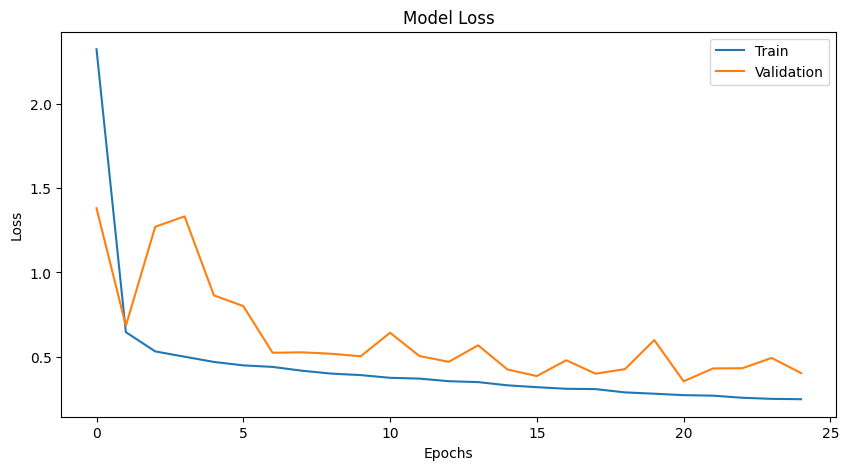

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Model Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

## 2. Accuracy

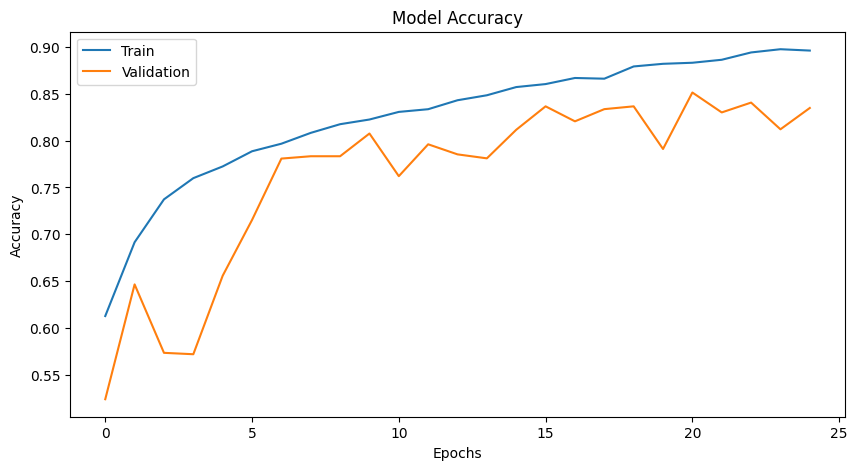

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Model Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

## Making Generator For Test Data

In [ ]:
#Test Generator
test_generator=datagen.flow_from_directory("/content/test",
    target_size=(150,150)  #Resize the image to (150x150) pixels
    , batch_size=128,  #specifies the number of samples in each batc
    class_mode='binary'  ) # specifies the type of problem, which is binary classification in our case


Found 5000 images belonging to 2 classes.


## Evaluation of Model Performance on Test Data

In [ ]:
loss,accuracy=model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

40/40 [==============================] - 39s 972ms/step - loss: 0.4156 - accuracy: 0.8350
Test Loss: 0.4155668020248413
Test Accuracy: 0.8349999785423279


## Saving The Model in "h5" File

In [ ]:
model.save('cats_vs_dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading Model To Do classification

In [ ]:
load_model=tf.keras.models.load_model('cats_vs_dogs.h5')

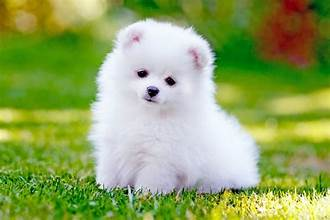

In [74]:
img_url="https://tse1.mm.bing.net/th?id=OIP.OT_m1hzXibs-tdpvR-EUkQHaE8&pid=Api&P=0&h=220"
img=Image.open(requests.get(img_url,stream=True).raw)
img

# Reshape The Picture

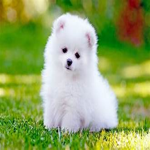

In [75]:
img=img.resize((150,150))
img

## Converting Image to Array

In [76]:
img_array=image.img_to_array(img)

## Expanding Dimension of Array

In [77]:
img=np.expand_dims(img_array,axis=0)

## Normalization

In [78]:
img=img/255.0

## Result of The Model

In [79]:
# Perform the prediction
prediction = model.predict(img)

# Set a threshold for classification
threshold = 0.5

# binary prediction based on the threshold
predicted_class = 'dog' if prediction > threshold else 'cat'

print(f"The predicted class is: {predicted_class}")


1/1 [==============================] - 0s 21ms/step
The predicted class is: dog
